In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Titanic Prediction 
Introduce the Problem 
The sinking of the Titanic is one of the most talked about subjects in history. Over 1500 people died and it is one of the biggest oceanic losses of life in history. The Titanic was seen as an unsinkable ship which made the tragedy even worse. One issue that the Titanic had was that it had a lot of people of different ages and economic status. The problem that we are going to try to solve is what made people die and is there a way to predict based on certain attributes that someone is going to die. So the goal is going to be to train a model to predict life or death of passengers.

In [47]:
titanic_df = pd.read_csv('titanic-dataset.csv')    

Introduce the Data
Data: https://www.kaggle.com/datasets/yasserh/titanic-dataset
This data contains information about the passengers that were on the titanic. It includes things like the name, age, gender, class if they had siblings and more. These specific features will be useful in deciding whether or not someone is going to die. Some of the imporant features that I will use in my models are p-class which is the class that the individual travelled on, Sibsp which is the number of siblings or spouses that someone was travelling with and Parch which is the number of parents or children that someone was travelling with. 

In [48]:
titanic_df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [49]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Preprocessing
Before we do anything with models or visualizations we need to do preprocessing. For this I first checked for null values. There were nulls for cabin and age and embarked. Both cabins could have been useful but with so many missing variables I decided to drop the column. For embarked there were only 2 missing values but it wasn’t relevant to the questions I was trying to answer so I dropped it as well. The last was age which had 177 missing values. For this I decided to fill those missing values with the median so I could get a good idea even with the missing values. 

In [50]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)


In [51]:
titanic_df.drop(['Embarked'], axis=1, inplace=True)

In [52]:
age_median = titanic_df['Age'].median()
titanic_df['Age'].fillna(age_median, inplace=True)

C:\Users\mncha\AppData\Local\Temp\ipykernel_25276\3846291709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_median, inplace=True)


In [53]:
titanic_df.shape

(891, 10)

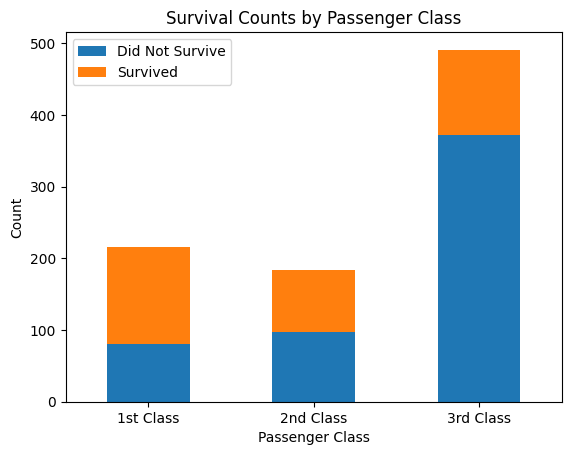

In [54]:
survival_counts = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)  # Adjust x-ticks for clarity
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

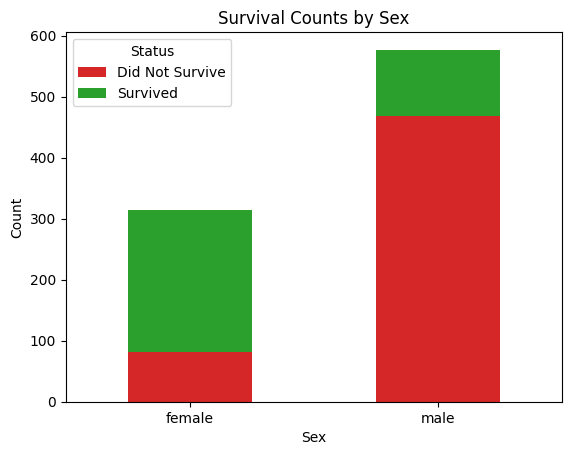

In [55]:
survival_sex = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
survival_sex.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'])
plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Status')
plt.show()

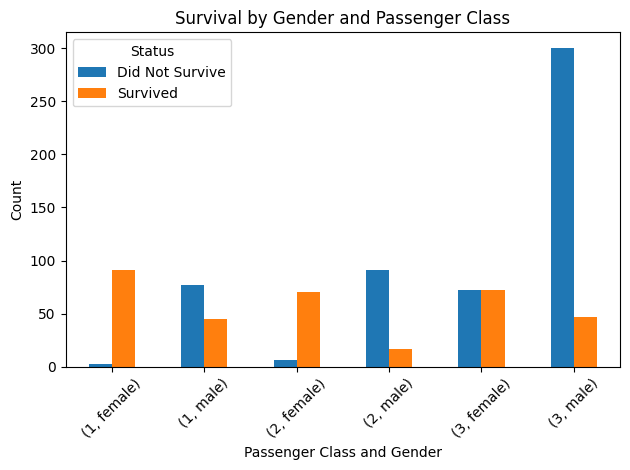

In [56]:
class_gender_survival = titanic_df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()
class_gender_survival.plot(kind='bar', stacked=False)
plt.title('Survival by Gender and Passenger Class')
plt.xlabel('Passenger Class and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Did Not Survive', 'Survived'], title='Status')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [57]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex',], drop_first=True)

Modeling
For modeling I’m using a decision tree and a logistic regression to help figure out if someone on the titanic is going to die or if they are going to live. I wanted to see how the accuracy scores between the two different models compared. The decison tree model primarily focuses on different rules and then eventually getting the data into a specfiic group. I chose is specifically because it was something that I had an understanding of and it is simple to do. The other model that I chose to use was the logistic regression which is used to predict binary outcomes. For this case it was to predict weather or not somebody survived based on a set of features. I used this because it is easy to understand and can show you the effect that each feature has on the probablity of surviving.  

In [58]:
X = titanic_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
class1_report = classification_report(y_test, y_pred)
print(class1_report)

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True


In [63]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',]
X = titanic_df[features]
y = titanic_df['Survived']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
class_report = classification_report(y_test, y_pred)

Accuracy: 0.80


In [67]:
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Evaluation 
After using both models and finding their accuracy scores I came to the conclusion that they were pretty similar. The logistic regression was slightly more accurate. This means that for the future it would be better to work to improve my logistic regression than decison tree. The main metric I used to comprare them was accuracy which isn't always the best but for this scenario it is what I used. 

Storytelling
I learned a lot thorugh working with this set of data. Going into this project I was interested in knowing the actual effect that being a 3rd class passenger had on living on the titanic. After creating my visualizations it was made very apparent that being a 3rd class passenger had a large effect on whether or not you were going to live. Women and children first has always been the saying for any event like this and it was apparent that those who were women lived. Something that suprised me was the amount of first class men that died. Though women and children are first I thought that a lot more first class men would have survivied. It did answer the question of what factors affect who lived and who died on the titanic and it was more clear than I had anticipated going in.

Impacts
I think the impacts for this is that it can tell you what things affect people surviving a catastrophic event. I think that this could be important for things like positioning. Like if someone has over 5 kids with them they have to be closer to a life raft than those who don't. Or those who are over the age of 45 need to be closer. I think negative impacts of this could also be bias or misinformation. Statistics don't tell the whole story has its widely known that on the Titanic 3rd class members were treated differently so the data may have a bias to those who weren't 3rd class and to those who were.  

References
https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
https://www.geeksforgeeks.org/decision-tree/
chatpgt for grading